#CMP KDO 8-phosphate biosynthesis pathway

##Benchmark pathway

http://biocyc.org/META/new-image?object=PWY-1269

##Import libraries

In [1]:
%pylab inline
import sys
sys.path.append('/trombone1/home/scalhoun/bin/repo')

from analyze_test import pathens
from analyze_test import pathstring_to_table
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


##Define file locations, input enzymes/ligands, and true pathway

In [2]:
picklefile = 'output/kdo_2sd.pickle'
datafile = 'data/data_kdo.h5'
enzs = ['01', '04', '03', '06a']
ligands = ['ZINC01532567', 'ZINC03606137', 'ZINC03870009', 'ZINC02562361', 'ZINC30725157']

##Load the pathway models from the output pickle file and data

In [3]:
pE = pathens(datafile=datafile)
pE.set_all_enzymes(enzs)
pE.set_true_enzymes(enzs)
pE.set_true_ligands(ligands)
pE.set_true_path()
pE.load_data_from_analysis_pickle(picklefile)
pE.make_position_matrices()
print 'Number of unique paths: %d' % len(pE.uniqpathstrs)
print 'Number of clusters: %d' % np.max(pE.flatclusters)

Number of unique paths: 29
Number of clusters: 5


##Find the rank of the pathway model that matches the true pathway

In [4]:
score = pE.np_path_array['obj'][pE.np_path_array['strrepr'] == pE.true_path]
print 'Rank of true path: %d' % (np.sum(pE.np_path_array['obj'] > score) + 1)
HTML(pathstring_to_table(pE.true_path))

Rank of true path: 18


,01,,04,,03,,06a,


##Entropy by position

For the ensemble of pathway models, determine the entropy averaged over positions, occurrence of correct interactions (averaged over all pathway positions), and ranks of correct components at each position

In [5]:
pE.evaluate_accuracy_precision()

Mean Entropy: 0.829
Mean Interaction Weight: 0.272
Mean Ranks over Position: 1.778
  Components appearing at position: 9.0


##Rank of substrate and product to their corresponding enzyme

In [6]:
HTML(pE.ligand_rankings_html())

Enzyme,Substrate rank from individual docking run,Product rank from individual docking run,Substrate rank by integrated approach,Product rank by integrated approach,Interaction rank by integrated approach
01,3228,3238,1,1,3
04,543,36,2,3,4
03,3204,2804,4,5,8
06a,1607,3001,1,1,1


##Frequency of enzyme occurring in pathway model ensemble at every position

In [8]:
HTML(pE.enzyme_pos_html())

,01,04,03,06a
1,34.5,0.0,65.5,0.0
2,65.5,6.9,27.6,0.0
3,0.0,93.1,6.9,0.0
4,0.0,0.0,0.0,100.0


##Accuracy by position

By position going across, the component (metabolite or protein) is ordered vertically by frequency occuring at that position in the ensemble of pathway models

In [10]:
HTML(pE.get_html_table(percent_cutoff=.01, enz_percent_cutoff=0.15, urlstring_to_image='http://zinc.docking.org/img/sub/%s.gif'))

##Evaluate sampling coverage

Test to evaluate the sampling coverage. For an increasing number of runs, the number of unique clusters observed from those runs were plotted. For each N number of runs, the cluster counts were repeated 50 times with a different group of N runs chosen at random.

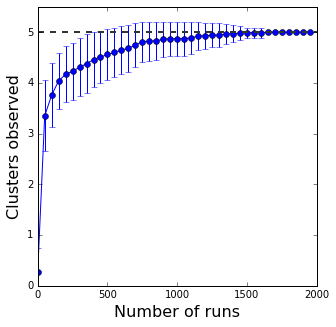

In [15]:
pE.plot_convergence_by_runs(run_increment=50)

 ________________________________________________________________________________________________________

## Predicting KDO-8P pathway with decoy enzymes in the candidate set

The protein candidate set includes enzymes that are not in the true pathway (enzymes are taken from the serine biosynthesis pathway).

Load data from output pickle files for different pathway lengths from 3 to 6 enzymes

In [17]:
datafile = './data/data_kdo_ser.h5'

P3 = pathens(datafile=datafile)
P3.load_data_from_analysis_pickle('./output/pathcomb2_3.pickle')
P4 = pathens(datafile=datafile)
P4.load_data_from_analysis_pickle('./output/pathcomb2_4.pickle')
P5 = pathens(datafile=datafile)
P5.load_data_from_analysis_pickle('./output/pathcomb2_5.pickle')

# With 6 enzymes in pathway, no pathways were within 2 standard deviations of the best score
# so a lower cutoff was defined to analyze the best scoring pathway models
P6 = pathens(datafile=datafile)
P6.load_data_from_analysis_pickle('./output/pathcomb2_2.5sd_6.pickle')

allpaths = np.concatenate([P3.np_path_array, P4.np_path_array, P5.np_path_array])
allpaths.sort(order='obj')

enzs = ['k1', 'k2', 'k3', 'k4']
ligands = ['ZINC01532567', 'ZINC03606137', 'ZINC03870009', 'ZINC02562361', 'ZINC30725157']
P4.set_true_path(enzymelist=enzs, ligandlist=ligands)

After combining all good-scoring pathway models for different lengths, find the rank of the pathway model tha matches the true pathway

In [18]:
truescore = allpaths['obj'][allpaths['strrepr'] == P4.true_path]
print 'Rank of true path: %d' % (np.sum(allpaths['obj'] > truescore) + 1)
print 'Number of unique paths: %d' % len(allpaths)

Rank of true path: 7
Number of unique paths: 121


Best scoring pathway models for N = 3, 4, 5, 6

In [19]:
H3 = pathstring_to_table(P3.best_path, title=('Three enzymes\nScore = %.3f' % P3.best_score))
H4 = pathstring_to_table(P4.best_path, title=('Four enzymes\nScore = %.3f' % P4.best_score))
H5 = pathstring_to_table(P5.best_path, title=('Five enzymes\nScore = %.3f' % P5.best_score))
H6 = pathstring_to_table(P6.best_path, title=('Six enzymes\nScore = %.3f' % P6.best_score))

HTML('<table>%s%s%s%s</table>' % (H3, H4, H5, H6))

Plot of the scores for pathway models at each length. The best score at each length is shown as a blue circle, the score of the pathway model that matches the true pathway is shown as a green triangle, and all other scores as black dots. The cutoff for good scoring models shown as a red dashed line.

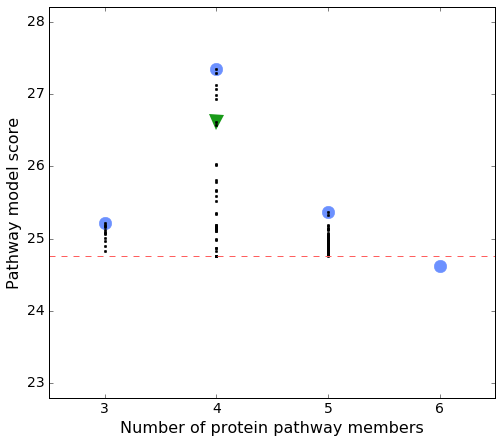

In [29]:
truescore = allpaths['obj'][allpaths['strrepr'] == P4.true_path]
best = np.max([P3.best_score, P4.best_score, P5.best_score, P6.best_score])
stdev = 1.294329566
cutoff = best - 2*stdev

xs = [0.5, 1.5, 2.5, 3.5]
colors=['#6c91ff', '#ff5f5f', '#199A19']

fig = plt.figure(figsize=(8, 7))
ax = plt.subplot(1, 1, 1)
ax.plot(xs, [P3.best_score, P4.best_score, P5.best_score, P6.best_score], '.', ms=25, color=colors[0])
ax.plot(xs[1], truescore, 'v', ms=15, color=colors[2], markeredgewidth=0.)
ax.plot([0.5]*len(P3.np_path_array), P3.np_path_array, '.', ms=5, color='k')
ax.plot([1.5]*len(P4.np_path_array), P4.np_path_array, '.', ms=5, color='k')
ax.plot([2.5]*len(P5.np_path_array), P5.np_path_array, '.', ms=5, color='k')
ax.set_xticklabels(['3', '4', '5', '6'], fontsize=14)
ax.set_xticks(xs)
ax.set_yticks(range(23,29))
ax.set_yticklabels(range(23,29), fontsize=14)
ax.set_xlim(0.0, 4.)
ax.set_ylim(22.8, 28.2)
ax.axhline(cutoff, ls='--', color=colors[1])
ax.set_xlabel('Number of protein pathway members', fontsize=16)
ax.set_ylabel('Pathway model score', fontsize=16)
plt.show()

_____________________________________________________________________________________

## Predicting KDO-8P pathway with dummy enzyme in candidate set in place of known enzyme

In the candidate set of enzymes, we replaced one enzyme with a dummy enzyme and test whether we can still reconstruct the pathway.

Define file locations, input enzymes/ligands, and true pathway

In [22]:
picklefile = './output/kdo_dummy_lowcutoff.pickle'
datafile = './data/data_kdo.h5'
enzs = ['01', 'D', '03', '06a']
ligands = ['ZINC01532567', 'ZINC03606137', 'ZINC03870009', 'ZINC02562361', 'ZINC30725157']

Load the pathway models from the output pickle file and data

In [23]:
pE = pathens(datafile=datafile)
pE.set_all_enzymes(enzs)
pE.set_true_enzymes(enzs)
pE.set_true_ligands(ligands)
pE.set_true_path()
pE.load_data_from_analysis_pickle(picklefile)
pE.make_position_matrices()
print 'Number of unique paths: %d' % len(pE.uniqpathstrs)

Number of unique paths: 8536


Find the rank of the pathway model that matches the true pathway with the dummy enzyme in place of the missing enzyme

In [24]:
score = pE.np_path_array['obj'][pE.np_path_array['strrepr'] == pE.true_path]
print 'Rank of correct path: %d' % (np.sum(pE.np_path_array['obj'] > score) + 1)
print pE.true_path

Rank of correct path: 8389
ZINC01532567 -> 01 -> ZINC03606137 -> D -> ZINC03870009 -> 03 -> ZINC02562361 -> 06a -> ZINC30725157


Rank of substrate and product to their corresponding enzyme

In [25]:
HTML(pE.ligand_rankings_html())

Enzyme,Substrate rank from individual docking run,Product rank from individual docking run,Substrate rank by integrated approach,Product rank by integrated approach,Interaction rank by integrated approach
01,3228,3238,43,45,57
D,-1,-1,77,37,79
03,3204,2804,37,30,64
06a,1607,3001,33,7,53


Frequency of enzyme occuring in pathway model ensemble at every position

In [26]:
HTML(pE.enzyme_pos_html())

,01,D,03,06a
1,24.3,26.6,48.8,0.3
2,35.8,36.9,26.1,1.2
3,39.7,34.8,20.3,5.2
4,0.2,1.7,4.9,93.3
